# ML6Assign_KNN_DecisionTrees

## Challenge: Find the 2-3 AddressCity values that are most easily distinguishable by KNN and/or a Decision Tree

This is a somewhat quirky exercise that simply came from my curiosity about how we might use what we have learned (or at least been exposed to) over the last couple of days to determine the 'best' pair/triple of AddressCity values to select for our task.

### There are certainly multiple ways we might be able to accomplish this task:

1) We could 'simply' try every pair or triple of AddressCity values with our ML algorithms to see which pair yields the best results.

(In this case, we may indeed find the best pair, but we might not have any idea about why one pair is a better choice over another. We don't really learn a great deal.)

2) Another method might be to take a look at the basic stats of each of the possible features grouped by each AddressCity. We could then compare the results from AddressCity to AddressCity to help make our choice(s).

(This will take a little more thought for each of us. This will be our method of choice.)

### And ... what should we be looking for???

It seems that the simplest idea is that we would want to find the pair (or set) of AddressCity values that are as dissimilar as possible in terms of one or more of the features.

### What else might be helpful? 

In order to see these differences more easily, it may be beneficial to scale (or standardize) these statistics. 

It then may make sense to choose the AddressCity with the most positive, the most negative statistic(s) ... and possibly also the one closest to zero. 

After looking at this data, we might also see more clearly which feature(s) would be most distinguishable and thus best for differentiating among the chosen AddressCity values.

### Once we make our choice of AddressCity values, we will then create our KNN and Decision Tree models, explore our results, and comment on whether or not our expectations were correct.

So, ... let's begin!

In [ ]:
# Acquire the Nashville Housing Data from my GitHub repository
! git clone https://github.com/gacree/NashvilleHousing.git

Cloning into 'NashvilleHousing'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


Import packages, read data into dataframes, reassign column names



In [1]:
#import the pandas package for data analytics
# and matplotlib for visualizations
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data files into pandas dataframes .
# Notice that we must indicate the full path of the data file.
houses_2017 = pd.read_csv('NashvilleHousing/2017SINGLEFAMILYSF.txt')

# Alter the column names in each of the new dataframes
houses_2017.columns = ['APN', 'DistrictCode', 'CouncilDistrict', 'AddressFullAddress',
       'AddressCity', 'AddressPostalCode', 'LAND', 'IMPR', 'TOTALAPPR',
       'TOTALASSD', 'FinishedArea']

### We must create a new data frame of the basic stats from each of our features  by AddressCity.

Create AddressCityStats by including the basic stats of each potential feature: LAND, IMPR, TOTALAPPR, and FinishedArea ... by AddressCity

Add another column with the number of houses in each AddressCity.


In [2]:
# Recall: We can create a new dataframe with .groupby() and .agg()
# in the following way:

# NewDataframe = OldDataFrame.groupby('ColumnName')[['ColumnA','ColumnB','ColumnC','ColumnD']].agg(['min','median','max'])

# Create a dataframe entitled AddressCityStats with the min, median, and max 
# of our potential feature columns, for each AddressCity
AddressCityStats = houses_2017.groupby('AddressCity')[['LAND','IMPR','TOTALAPPR','FinishedArea']].agg(['min','median','max'])

# Create an additional column entitled 'HousesCount' containing the .value_counts()
# for each AddressCity.
AddressCityStats['HousesCount'] = houses_2017['AddressCity'].value_counts()

# View the new dataframe:
AddressCityStats

LAND                       IMPR                     \
                   min    median      max     min    median      max   
AddressCity                                                            
ANTIOCH           7300   32500.0  1488700       0  132500.0  1518000   
ASHLAND CITY     14600   38800.0   168500    3700  103700.0   471100   
BELLEVUE         43200   44400.0    45600  176300  203750.0   231200   
BRENTWOOD        32000   78000.0  1421800       0  276900.0  3183200   
FRANKLIN         37000  158750.0   234300       0  262950.0   562700   
GOODLETTSVILLE   13500   45000.0   729700       0  138400.0  1500800   
HERMITAGE        12000   38000.0  1250400       0  142100.0  2172200   
JOELTON           1500   47300.0   309200       0  152000.0  1025200   
LAVERGNE        129400  220500.0   339600    7600   40400.0    80400   
MADISON           4000   32000.0   334500       0  114100.0  1098400   
MOUNT JULIET     20000   61000.0   289600       0  253400.0   756200   
NASHVILLE          900   60000.0  4832000       0  161000.0  9911800   
NOLENSVILLE      33000   70000.0   253500       0  225650.0   588900   
OLD HICKORY       5200   35000.0   504000       0  138600.0  3827500   
PEGRAM           19000   60000.0   119400    5300  148300.0   517900   
WHITES CREEK     12000   39000.0   363300       0  135500.0  1163400   

               TOTALAPPR                     FinishedArea               \
                     min    median       max          min       median   
AddressCity                                                              
ANTIOCH            24000  166600.0   1892600          0.0  1650.000000   
ASHLAND CITY       31100  146200.0    554200        384.0  1350.000000   
BELLEVUE          221900  248150.0    274400       1792.0  1807.000000   
BRENTWOOD          64000  357000.0   3595200          0.0  2455.000000   
FRANKLIN          172000  420850.0    675000          0.0  2459.550050   
GOODLETTSVILLE     16000  185550.0   1671900          0.0  1725.000000   
HERMITAGE          33000  179750.0   3004200          0.0  1721.000000   
JOELTON             6900  202050.0   1120200          0.0  1735.500000   
LAVERGNE          169800  228100.0    420000        775.0  1242.000000   
MADISON             4000  147500.0   1232900          0.0  1356.000000   
MOUNT JULIET       22300  317350.0   1045800        480.0  2571.400025   
NASHVILLE           2500  231900.0  11495800          0.0  1585.000000   
NOLENSVILLE        33000  298850.0    732700          0.0  2004.500000   
OLD HICKORY        21000  175600.0   4275500          0.0  1546.500000   
PEGRAM             53700  213600.0    616100          0.0  1644.000000   
WHITES CREEK       26100  178400.0   1319000          0.0  1680.000000   

                            HousesCount  
                        max              
AddressCity                              
ANTIOCH          9922.00000       22770  
ASHLAND CITY     4200.00000         157  
BELLEVUE         1822.00000           2  
BRENTWOOD       14199.00000        4983  
FRANKLIN         5551.00000          26  
GOODLETTSVILLE  12326.00000        4422  
HERMITAGE       40417.00000       10894  
JOELTON         19034.00000        1506  
LAVERGNE         1568.00000           3  
MADISON         10367.95996        9771  
MOUNT JULIET     6237.10010         266  
NASHVILLE       22798.32031      134723  
NOLENSVILLE      5477.50000         800  
OLD HICKORY     12639.40039        5380  
PEGRAM           3748.00000         173  
WHITES CREEK     7759.00000        1238

### Let's sort AddressCityStats by HousesCount in order to decide whether or not to exclude some AddressCity values simply due to the lack of a sufficient number of properties.

You should make a decision about restricting only to AddressCity values with counts at a certain threshold (or not).

In [3]:
AddressCityStats.sort_values(by='HousesCount')

LAND                       IMPR                     \
                   min    median      max     min    median      max   
AddressCity                                                            
BELLEVUE         43200   44400.0    45600  176300  203750.0   231200   
LAVERGNE        129400  220500.0   339600    7600   40400.0    80400   
FRANKLIN         37000  158750.0   234300       0  262950.0   562700   
ASHLAND CITY     14600   38800.0   168500    3700  103700.0   471100   
PEGRAM           19000   60000.0   119400    5300  148300.0   517900   
MOUNT JULIET     20000   61000.0   289600       0  253400.0   756200   
NOLENSVILLE      33000   70000.0   253500       0  225650.0   588900   
WHITES CREEK     12000   39000.0   363300       0  135500.0  1163400   
JOELTON           1500   47300.0   309200       0  152000.0  1025200   
GOODLETTSVILLE   13500   45000.0   729700       0  138400.0  1500800   
BRENTWOOD        32000   78000.0  1421800       0  276900.0  3183200   
OLD HICKORY       5200   35000.0   504000       0  138600.0  3827500   
MADISON           4000   32000.0   334500       0  114100.0  1098400   
HERMITAGE        12000   38000.0  1250400       0  142100.0  2172200   
ANTIOCH           7300   32500.0  1488700       0  132500.0  1518000   
NASHVILLE          900   60000.0  4832000       0  161000.0  9911800   

               TOTALAPPR                     FinishedArea               \
                     min    median       max          min       median   
AddressCity                                                              
BELLEVUE          221900  248150.0    274400       1792.0  1807.000000   
LAVERGNE          169800  228100.0    420000        775.0  1242.000000   
FRANKLIN          172000  420850.0    675000          0.0  2459.550050   
ASHLAND CITY       31100  146200.0    554200        384.0  1350.000000   
PEGRAM             53700  213600.0    616100          0.0  1644.000000   
MOUNT JULIET       22300  317350.0   1045800        480.0  2571.400025   
NOLENSVILLE        33000  298850.0    732700          0.0  2004.500000   
WHITES CREEK       26100  178400.0   1319000          0.0  1680.000000   
JOELTON             6900  202050.0   1120200          0.0  1735.500000   
GOODLETTSVILLE     16000  185550.0   1671900          0.0  1725.000000   
BRENTWOOD          64000  357000.0   3595200          0.0  2455.000000   
OLD HICKORY        21000  175600.0   4275500          0.0  1546.500000   
MADISON             4000  147500.0   1232900          0.0  1356.000000   
HERMITAGE          33000  179750.0   3004200          0.0  1721.000000   
ANTIOCH            24000  166600.0   1892600          0.0  1650.000000   
NASHVILLE           2500  231900.0  11495800          0.0  1585.000000   

                            HousesCount  
                        max              
AddressCity                              
BELLEVUE         1822.00000           2  
LAVERGNE         1568.00000           3  
FRANKLIN         5551.00000          26  
ASHLAND CITY     4200.00000         157  
PEGRAM           3748.00000         173  
MOUNT JULIET     6237.10010         266  
NOLENSVILLE      5477.50000         800  
WHITES CREEK     7759.00000        1238  
JOELTON         19034.00000        1506  
GOODLETTSVILLE  12326.00000        4422  
BRENTWOOD       14199.00000        4983  
OLD HICKORY     12639.40039        5380  
MADISON         10367.95996        9771  
HERMITAGE       40417.00000       10894  
ANTIOCH          9922.00000       22770  
NASHVILLE       22798.32031      134723

# Questions Begin Here!

'# 1'
### Determine (with your breakout group) an appropriate threshold ... requiring at least ??? number of properties to consider using an AddressCity.

What number of properties will you require?

1000
...

In [4]:
# 2
# If you choose to make such a restriction, uncomment the following 
# line and replace the ??? with your threshold on HousesCount.

AddressCityStats = AddressCityStats[AddressCityStats['HousesCount']>= 1000]

### Let's scale our data to help see our differences even more clearly.

This process will change the actual statistics found in AddressCityStats to the number of standard deviations each stat is from the mean. This will show (more clearly) which are the highest, lowest, and which are closest to the mean.

In [5]:
from sklearn import preprocessing
# Get column names first
names = AddressCityStats.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_AddressCityStats = scaler.fit_transform(AddressCityStats)

# Use the results to create a scaled dataframe
scaled_AddressCityStats = pd.DataFrame(scaled_AddressCityStats, columns=names)

# Reset the index to AddressCity as in the original dataframe
scaled_AddressCityStats.index = AddressCityStats.index

# View the scaled dataframe
scaled_AddressCityStats


LAND                     IMPR                      \
                     min    median       max  min    median       max   
AddressCity                                                             
ANTIOCH        -0.280950 -0.890834  0.178977  0.0 -0.491069 -0.488246   
BRENTWOOD       2.470380  2.300736  0.129196  0.0  2.722393  0.135108   
GOODLETTSVILLE  0.409667 -0.014029 -0.385809  0.0 -0.359771 -0.494684   
HERMITAGE       0.242582 -0.505040  0.001654  0.0 -0.277432 -0.243351   
JOELTON        -0.927011  0.147303 -0.698711  0.0 -0.057118 -0.672722   
MADISON        -0.648537 -0.925906 -0.679885  0.0 -0.900541 -0.645320   
NASHVILLE      -0.993845  1.038137  2.666791  0.0  0.143167  2.653905   
OLD HICKORY    -0.514869 -0.715473 -0.553757  0.0 -0.355321  0.376297   
WHITES CREEK    0.242582 -0.434895 -0.658455  0.0 -0.424308 -0.620987   

               TOTALAPPR                     FinishedArea                      \
                     min    median       max          min    median       max   
AddressCity                                                                     
ANTIOCH         0.115008 -0.613640 -0.452284          0.0 -0.236009 -0.703396   
BRENTWOOD       2.353003  2.622346  0.098900          0.0  2.594922 -0.253367   
GOODLETTSVILLE -0.332591 -0.291571 -0.523731          0.0  0.027743 -0.450445   
HERMITAGE       0.618557 -0.390146 -0.092425          0.0  0.013676  2.505305   
JOELTON        -0.841735 -0.011142 -0.702333          0.0  0.064668  0.255374   
MADISON        -1.003989 -0.938259 -0.665849          0.0 -1.269914 -0.656471   
NASHVILLE      -1.087914  0.496181  2.656565          0.0 -0.464593  0.651458   
OLD HICKORY    -0.052842 -0.460679  0.319134          0.0 -0.599985 -0.417469   
WHITES CREEK    0.232503 -0.413091 -0.637976          0.0 -0.130508 -0.930988   

               HousesCount  
                            
AddressCity                 
ANTIOCH           0.025407  
BRENTWOOD        -0.414629  
GOODLETTSVILLE   -0.428508  
HERMITAGE        -0.268395  
JOELTON          -0.500647  
MADISON          -0.296178  
NASHVILLE         2.795034  
OLD HICKORY      -0.404807  
WHITES CREEK     -0.507277

In [6]:
# 3
# It may be helpful to sort the dataframe by each of the stats of interest 
# to determine which AddressCity you may want to choose.
# For example ...
scaled_AddressCityStats.sort_values(by=('LAND','median'))

# Note: I would recommend that you keep 'median' and change only the 'LAND' 
# to other potential feature names.

# You should repeat this process for other stats of interest
# taking note of the AddressCity values which tend towards the top, bottom, and 
# middle of the list.

LAND                     IMPR                      \
                     min    median       max  min    median       max   
AddressCity                                                             
MADISON        -0.648537 -0.925906 -0.679885  0.0 -0.900541 -0.645320   
ANTIOCH        -0.280950 -0.890834  0.178977  0.0 -0.491069 -0.488246   
OLD HICKORY    -0.514869 -0.715473 -0.553757  0.0 -0.355321  0.376297   
HERMITAGE       0.242582 -0.505040  0.001654  0.0 -0.277432 -0.243351   
WHITES CREEK    0.242582 -0.434895 -0.658455  0.0 -0.424308 -0.620987   
GOODLETTSVILLE  0.409667 -0.014029 -0.385809  0.0 -0.359771 -0.494684   
JOELTON        -0.927011  0.147303 -0.698711  0.0 -0.057118 -0.672722   
NASHVILLE      -0.993845  1.038137  2.666791  0.0  0.143167  2.653905   
BRENTWOOD       2.470380  2.300736  0.129196  0.0  2.722393  0.135108   

               TOTALAPPR                     FinishedArea                      \
                     min    median       max          min    median       max   
AddressCity                                                                     
MADISON        -1.003989 -0.938259 -0.665849          0.0 -1.269914 -0.656471   
ANTIOCH         0.115008 -0.613640 -0.452284          0.0 -0.236009 -0.703396   
OLD HICKORY    -0.052842 -0.460679  0.319134          0.0 -0.599985 -0.417469   
HERMITAGE       0.618557 -0.390146 -0.092425          0.0  0.013676  2.505305   
WHITES CREEK    0.232503 -0.413091 -0.637976          0.0 -0.130508 -0.930988   
GOODLETTSVILLE -0.332591 -0.291571 -0.523731          0.0  0.027743 -0.450445   
JOELTON        -0.841735 -0.011142 -0.702333          0.0  0.064668  0.255374   
NASHVILLE      -1.087914  0.496181  2.656565          0.0 -0.464593  0.651458   
BRENTWOOD       2.353003  2.622346  0.098900          0.0  2.594922 -0.253367   

               HousesCount  
                            
AddressCity                 
MADISON          -0.296178  
ANTIOCH           0.025407  
OLD HICKORY      -0.404807  
HERMITAGE        -0.268395  
WHITES CREEK     -0.507277  
GOODLETTSVILLE   -0.428508  
JOELTON          -0.500647  
NASHVILLE         2.795034  
BRENTWOOD        -0.414629

'# 4'
### Which AddressCity will you choose that tends toward the top of the list with more negative stats?
Madison
...

### Which AddressCity will you choose that tends toward the bottom of the list with more positive stats?
Brentwood
...

### Which AddressCity will you choose that tends toward the middle of the list with stats closer to zero?
Goodlettsville
...


In [7]:
# 5
# Choose your two (or three) AddressCity values in the following code:
'''
houses_2017 = houses_2017[(houses_2017['AddressCity']== '???')\
                          | (houses_2017['AddressCity']== '???')].sample(100)
''' 

# '''
houses_2017 = houses_2017[(houses_2017['AddressCity']== 'MADISON')\
                          | (houses_2017['AddressCity']== 'GOODLETTSVILLE')
                          | (houses_2017['AddressCity']== 'BRENTWOOD')].sample(200)                         
# '''


# Create the CityNum column and give it an initial value.
houses_2017['CityNum'] = 99

# Create a counter that will be incremented to assign distinct values to each AddressCity
i = 0

# Loop through each of the unique AddressCity values 
for city in houses_2017['AddressCity'].unique():
  # assign the counter value to the 'CityNum' for that AddressCity
  houses_2017.loc[houses_2017['AddressCity']== city, 'CityNum'] = i
  # increment the counter for use for the next AddressCity
  i+=1
  
# View a sample of the resulting dataframe
houses_2017[['AddressCity','CityNum']]

,AddressCity,CityNum
6409,GOODLETTSVILLE,0
183189,BRENTWOOD,1
169630,BRENTWOOD,1
5688,GOODLETTSVILLE,0
7222,MADISON,2
...,...,...
194433,BRENTWOOD,1
10909,MADISON,2
7978,MADISON,2
183225,BRENTWOOD,1


## Choose the Features and a Target for our problem.

In [29]:
# 6
# Define the features and the target from our dataset.
# Note again that based upon the quantitive data that is given,
# We will try to predict the 'CityNum' of a property.

# Again, to move easily see the workings of our machine learning
# models, we reduce our choice of features to only 2.

# Which features seemed to show the most impact or significant differences
# in # 3 above?
# Choose the TWO you select based upon you findings above.

# Features
X = houses_2017[['LAND','TOTALAPPR']]

# Target
y = houses_2017['CityNum']

## Create Training and Testing sets
Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the training set, on which we learn some properties; we call the other set the testing set, on which we test the learned properties.

In [30]:
# import the package to create the Training and Testing split.
from sklearn.model_selection import train_test_split

# The code below splits our X and y into training and testing sets. 
# Since test_size=0.30, the split will be 70% Training to 30% Testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

## Feature Scaling
Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated.

Since the range of values of raw data varies widely, in some machine learning algorithms, functions will not work properly without normalization (or standardization). For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. **If one of the features has a broad range of values, the distance will be governed by this particular feature**. Therefore, the range of all features should be normalized/standardized so that each feature contributes approximately proportionately to the final distance.

### In our specific case the **LAND values are much larger than the FinishedArea values**. Even in the EXTREME case, the FinishedArea will only range from 0-45000 while the LAND values may differ by hundreds of thousands (or more). Thus it is better to use a standard scale to remove these differences.

In [31]:
# We now transform our feature values to the number
# of Standard Deviations each value is from its mean.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

array([[-0.4487954 , -0.28568357],
       [-0.52153911, -0.58549422],
       [ 0.64236017,  0.25122224],
       [ 0.18165004,  0.04828918],
       [-0.49729121, -0.61914644]])

## Let's take a look at a scatter plot of the X_train, Y_train data:

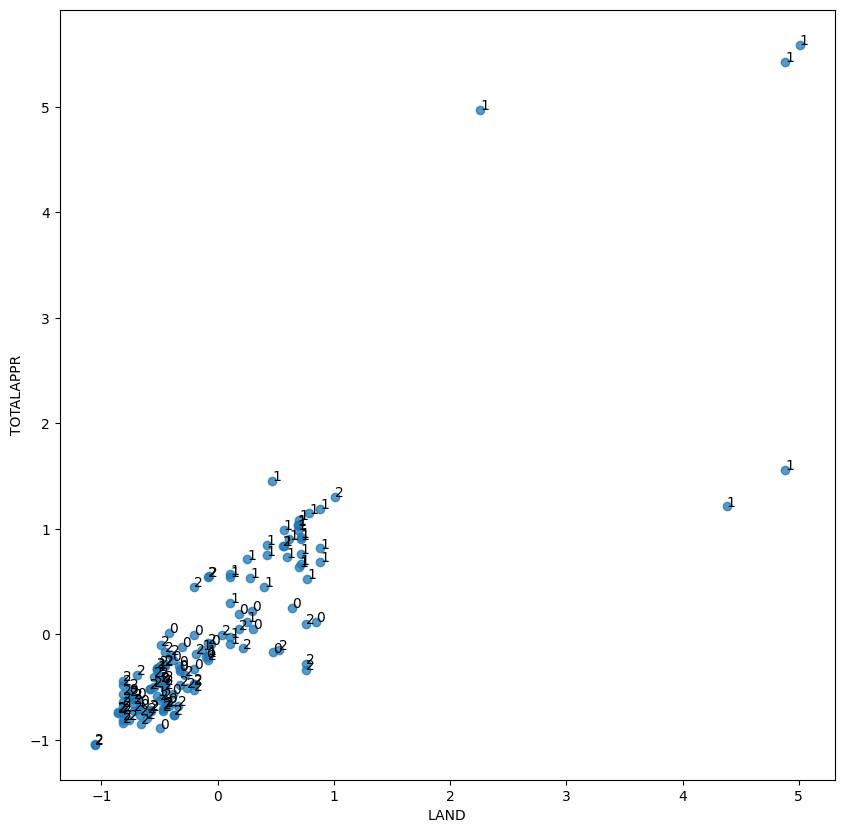

In [33]:
# 7
# Below we will examine the relationship between the LAND values 
# and the FinishedAreas of houses in 2017 and

# Notice that we will add annotations in the form of a number 
# for the AddressCity name for each point in the scatter plot.

fig = plt.subplots(figsize = (10,10))
plt.scatter(x = X_train[:,0], 
         y = X_train[:,1],
           alpha = 0.75)
plt.xlabel('LAND')
plt.ylabel('TOTALAPPR')

# Only use the annotation below if sample size <=1000

#'''
for i in range(0,len(X_train)):
    plt.annotate(xy = (X_train[i,0], X_train[i,1]),
                text = y_train.iloc[i]);
#'''


'# 8'
### Do you see a clear separation (in the annotations) of the AddressCity values in the scatter plot?

...

Does this give you a good indication about the possibilities for a good prediction model? Explain.
...

Yes, that would mean KNN can work better due to clear distinction between the annotations.


## KNN Model: Select, Instantiate, Fit, Score

In [34]:
## Select/Import the Model.
from sklearn.neighbors import KNeighborsClassifier
    
## Instantiate the Knn model with ... neighbors. 
KNN = KNeighborsClassifier(n_neighbors=3)
    
## Fit the model on the training data.
KNN.fit(X_train, y_train)
    
## See how the model performs on the test data.
print(KNN.score(X_test, y_test))

0.5666666666666667


### KNN Model: Evaluate ... Classification Report

In [35]:
# Predicted values of y based upon the model
y_pred = KNN.predict(X_test)

# The classification report shows how well the model performed on each possible outcome
# or CityNum in our case.
from sklearn.metrics import classification_report  

# The classification report compares what was predicted for the test set  
# against what was actually seen in the test set.
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.30      0.16      0.21        19
           1       0.80      0.63      0.71        19
           2       0.54      0.86      0.67        22

    accuracy                           0.57        60
   macro avg       0.55      0.55      0.53        60
weighted avg       0.55      0.57      0.53        60



'# 9'
### Notice the f1-scores for each of the AddressCity values chosen (0,1 or 0,1,2). Does the model perform better for one over the others? (Like we have seen previously) Or is it similar across each AddressCity?

Comment on your results below:
...

It is significantly better for AddressCity 1.

## Decision Tree Model: Select, Instantiate, Fit, Score

In [36]:
## Select/Import the Model.
from sklearn import tree

## Instantiate the Decision Tree model
Tree = tree.DecisionTreeClassifier()
# Possible input parameters ... criterion='gini'

## Fit the model on the training data.
Tree.fit(X_train, y_train)

## See how the model performs on the test data.
print(Tree.score(X_test, y_test))

0.6


### Decision Tree Model: Evaluate ... Classification Report

In [37]:
# Predicted values of y based upon the model
y_pred = Tree.predict(X_test)

# The classification report shows how well the model performed on each possible outcome
# or CityNum in our case.
from sklearn.metrics import classification_report  

# The classification report compares what was predicted for the test set  
# against what was actually seen in the test set.
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.42      0.26      0.32        19
           1       0.81      0.68      0.74        19
           2       0.56      0.82      0.67        22

    accuracy                           0.60        60
   macro avg       0.60      0.59      0.58        60
weighted avg       0.60      0.60      0.58        60



'# 10'
### Notice the f1-scores for each of the AddressCity values chosen (0,1 or 0,1,2). Does the model perform better for one over the others? (Like we have seen previously) Or is it similar across each AddressCity?

### Are the results similar/different to the results of the KNN?

Comment on your results below:

...

The results are similar to KNN but it is slightly better in each AddressCity.

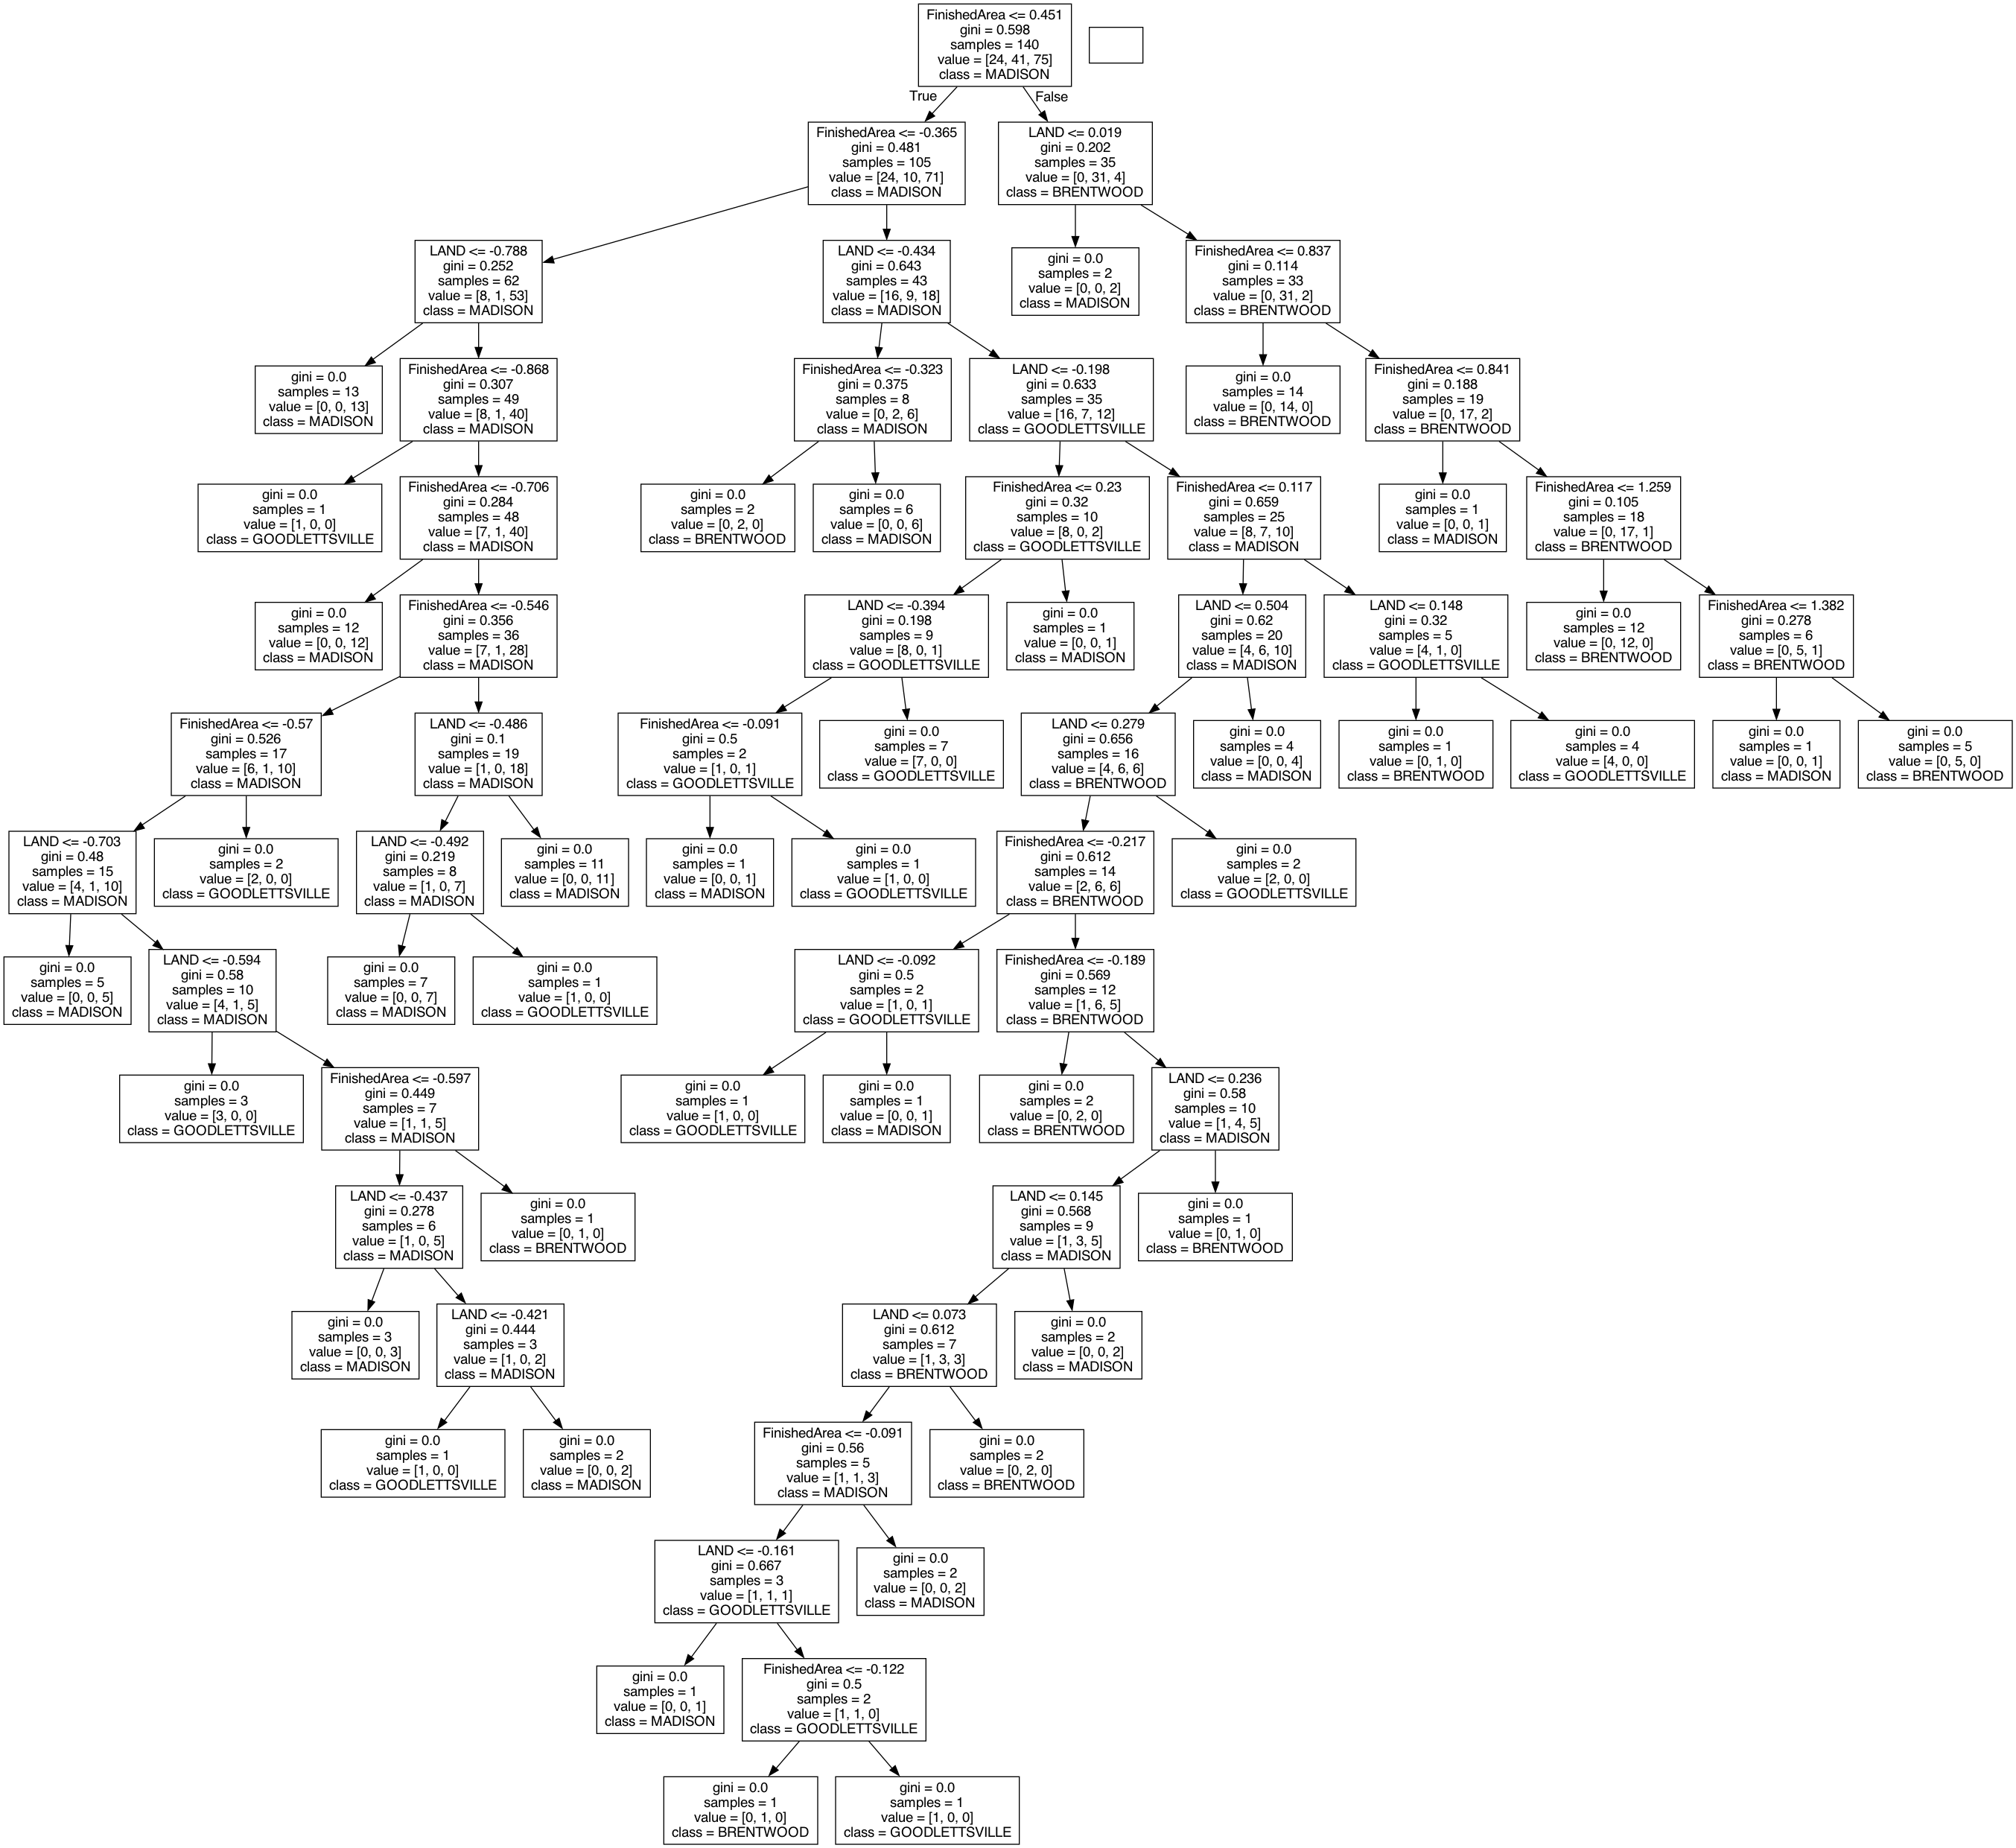

In [38]:
# Let's explore the Decision Tree for our Data Problem
# In the cell below, feel free to change the features to the ones you chose above.

import pydotplus
dot_data = tree.export_graphviz(Tree, out_file=None,
feature_names=['LAND','FinishedArea'], 
class_names=houses_2017['AddressCity'].unique()
)

from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data) 
# Show graph
Image(graph.create_png())

'# 11'
### Looking at the graph above ...

What is the initial prediction in the root node of the tree?

Which feature is used in the first decision rule? Does this make sense intuitively to you? Explain.

...

According to the root node, if FinishedArea <= 0.451, the city is Madison. It makes sense because the maximum standardized FinishedArea for Madison is -0.656471.